# Combining Data and Manually Removing Outliers

Following course module from Pluralsight: [Combining and Shaping Data by Janani Ravi](https://app.pluralsight.com/library/courses/combining-shaping-data/description).

For Code Louisville, Data Analytics, Course 2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mall_customers_info = pd.read_csv("datasets/mall_customers_info.csv")

mall_customers_info.head()

,CustomerID,Gender,Age,Annual_Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [4]:
mall_customers_info.shape

(150, 4)

In [6]:
mall_customers_scores = pd.read_csv("datasets/mall_customers_score.csv")

mall_customers_scores.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


In [7]:
mall_customers_scores.shape

(150, 2)

In [10]:
# Same number as info table
# Merge to one 

customer_data = pd.merge(mall_customers_info,
                        mall_customers_scores[['CustomerID', 'Spending Score (1-100)']],
                        on='CustomerID')

customer_data

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
145,146,Male,28,77,97
146,147,Male,48,77,36
147,148,Female,32,77,74
148,149,Female,34,78,22


In [11]:
customer_data.shape

(150, 5)

In [12]:
# New customers added to a different sheet
customers_data_2 = pd.read_csv("datasets/customers_data_2.csv")

customers_data_2.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,151,Male,43,78,17
1,152,Male,39,78,88
2,153,Female,44,78,20
3,154,Female,38,78,76
4,155,Female,47,78,16


In [13]:
customers_data_2.shape

(50, 5)

In [15]:
# Create single df

customers_data_com = pd.concat([customer_data, customers_data_2])
customers_data_com.sample(10)

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
32,183,Male,46,98,15
47,48,Female,50,40,47
35,36,Female,21,33,81
93,94,Female,40,60,40
58,59,Female,27,46,51
48,199,Male,32,170,70
1,152,Male,39,78,88
113,114,Male,19,64,46
15,166,Female,36,85,75
34,35,Female,49,33,14


In [17]:
# Reset the index

customers_data_com.reset_index(inplace=True, drop=True)

customers_data_com

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,115,28
197,198,Male,32,115,74
198,199,Male,32,170,70


In [18]:
customers_data_com.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual_Income              int64
Spending Score (1-100)     int64
dtype: object

In [19]:
customers_data_com.describe()

# Notice the mean income to max income
# Indicates there may be outliers

,CustomerID,Age,Annual_Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.00000
mean,100.500000,39.115000,59.815000,50.61500
std,57.879185,13.821612,27.738564,25.63283
min,1.000000,18.000000,6.000000,1.00000
25%,50.750000,29.000000,40.000000,35.00000
50%,100.500000,36.000000,60.500000,50.00000
75%,150.250000,49.000000,77.250000,73.00000
max,200.000000,70.000000,170.000000,98.00000


In [20]:
customers_data_com.to_csv('datasets/combined_customers_data', index=False)

In [22]:
# Check for missing fields

customers_data_com.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

In [23]:
# Check unique values

customers_data_com.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

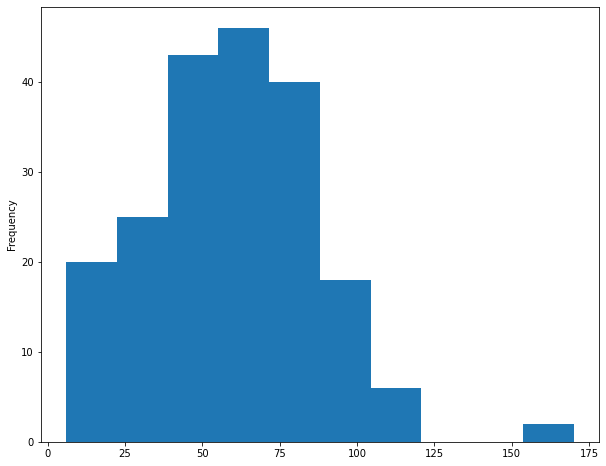

In [24]:
customers_data_com['Annual_Income'].plot.hist(bins=10, figsize=(10, 8));

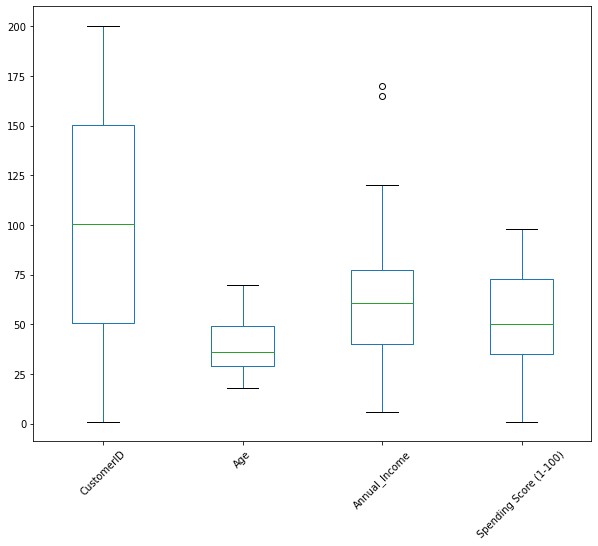

In [25]:
boxplot = customers_data_com.boxplot(grid=False, rot=45, figsize=(10,8));

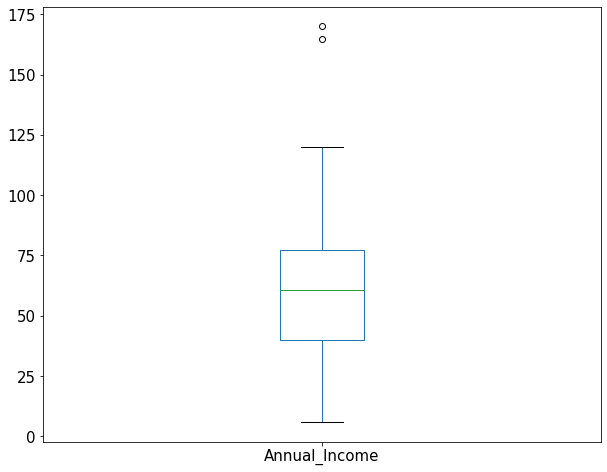

In [26]:
boxplot = customers_data_com.boxplot(grid=False, fontsize=15,
                                     column=['Annual_Income'], figsize=(10,8));

In [27]:
# Isolate the two records over the boxplot

customers_data_com.loc[customers_data_com['Annual_Income'] > 125]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [33]:
# Calculate quartile range

Q1 = customers_data_com['Annual_Income'].quantile(0.25)
Q3 = customers_data_com['Annual_Income'].quantile(0.75)

In [34]:
print(Q1, Q3)

40.0 77.25


In [35]:
# Interquartile range
IQR = Q3 - Q1

print(IQR)

37.25


In [36]:
minimum = Q1 - 1.5 * IQR

maximum = Q3 + 1.5 * IQR

In [37]:
print(minimum, maximum)

-15.875 133.125


In [40]:
# Add column to identify outliers
# Default value False

customers_data_com['Annual_Income_Outlier'] = False

In [42]:
# Iterate over records for outliers

for index, row in customers_data_com.iterrows():
    
    if row['Annual_Income'] > maximum:
        customers_data_com.at[index, 'Annual_Income_Outlier'] = True

In [43]:
customers_data_com['Annual_Income_Outlier'].sum()

2

In [45]:
# One way to deal with outliers
# Replace outlier value with the mean

mean = customers_data_com['Annual_Income'].mean()
mean

59.815

In [47]:
# Iterate again to replace

for index, row in customers_data_com.iterrows():
    
    if row['Annual_Income_Outlier'] == True:
        customers_data_com.at[index, 'Annual_Income'] = mean

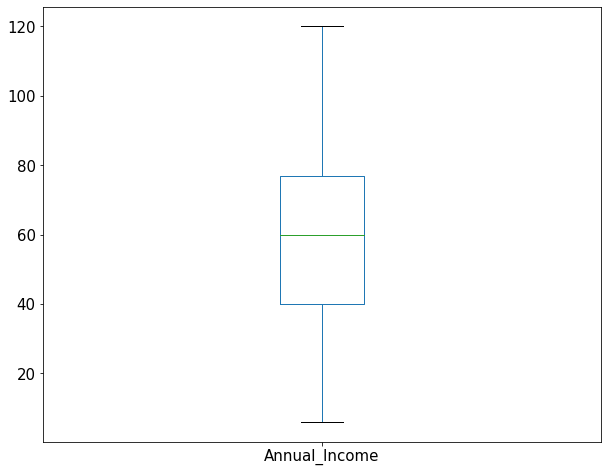

In [48]:
# Check boxplot again

boxplot = customers_data_com.boxplot(grid=False, fontsize=15,
                                     column=['Annual_Income'], figsize=(10,8));